# Convolution

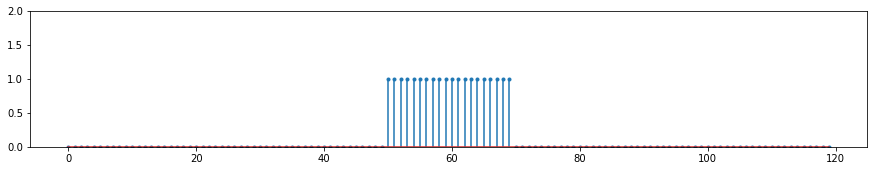

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# simple signal

sig = np.concatenate((np.zeros(50), np.ones(20), np.zeros(50)))
t = np.arange(0, len(sig))

fig = plt.figure(figsize=(15,2.5)); ax = plt.axes()
ax.stem(t, sig, linefmt=None, markerfmt='.', basefmt=None, use_line_collection=True); ax.set_ylim((0,2));

(0.0, 2.0)

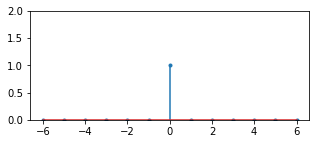

In [2]:
# simple example filter

fil = np.array([0, 0,  0,  0,  0,  0,  1,  0,  0,  0,  0, 0, 0,])
#fil = np.array([1, 0,  0,  0,  0,  0,  0,  0,  0,  0,  0, 0, 0,])
#fil = np.array([0, 0,  0,  0,  0,  0,  2,  0,  0,  0,  0, 0, 0,])
#fil = np.array([0, 0,  0,  0, .2, .2, .2, .2, .2,  0,  0, 0, 0,])
#fil = np.array([0, 0,  0,  0, .1, .2, .4, .2, .1,  0,  0, 0, 0,])
#fil = np.array([0, 0, .2, .2, .1,  0,  0,  0, .1, .2, .2, 0, 0,])

t = np.arange(0, len(fil)) - np.floor(len(fil)/2)

fig = plt.figure(figsize=(5,2)); ax = plt.axes()
ax.stem(t, fil, linefmt=None, markerfmt='.', basefmt=None, use_line_collection=True); ax.set_ylim((0,2))

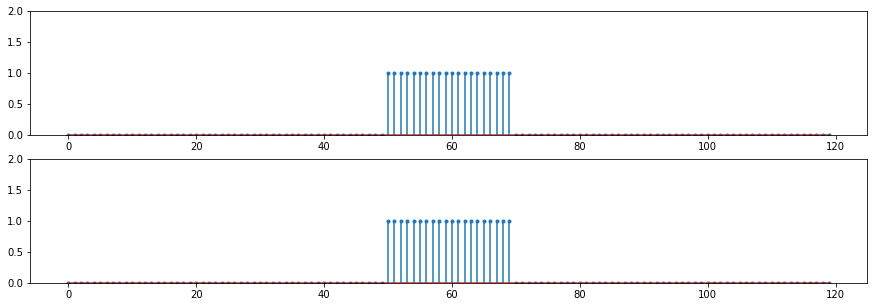

In [3]:
from scipy import signal

filtered = signal.convolve(sig, fil, mode='same')
t = np.arange(0, len(filtered))

fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(15,5))

axs[0].stem(t, sig,      linefmt=None, markerfmt='.', basefmt=None, use_line_collection=True); axs[0].set_ylim((0,2)); 
axs[1].stem(t, filtered, linefmt=None, markerfmt='.', basefmt=None, use_line_collection=True); axs[1].set_ylim((0,2)); 

### Spiking Neuron Example

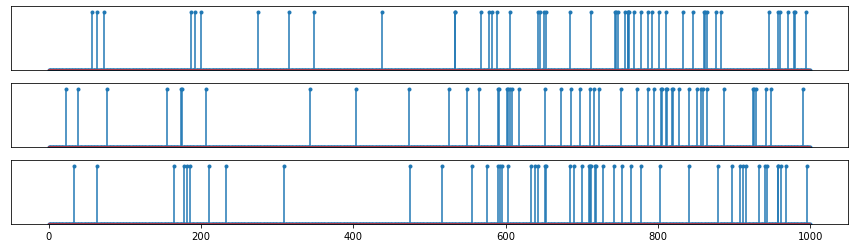

In [4]:
import numpy as np
import numpy.random as R
import matplotlib.pyplot as plt
from scipy import signal

# this is NOT how we would really simulate spikes
def create_spikes(maxt, propback, propsig):

    spikesback = np.concatenate((np.ones(int(propback*maxt)), np.zeros(int((1-propback)*maxt))))
    spikesback = R.permutation(spikesback)

    spikessig = np.concatenate((np.ones(int(propsig*maxt)), np.zeros(int((1-propsig)*maxt))))
    spikessig = R.permutation(spikessig)

    spikes = np.concatenate((spikesback, spikessig))
    
    return(spikes)

maxt = 500
propback = .02
propsig = .08

spikes1 = create_spikes(maxt, propback, propsig)
spikes2 = create_spikes(maxt, propback, propsig)
spikes3 = create_spikes(maxt, propback, propsig)
t = np.arange(2*maxt)

fig, axs = plt.subplots(nrows=3, ncols=1, figsize=(15,4))
axs[0].stem(t, spikes1, linefmt=None, markerfmt='.', basefmt=None, use_line_collection=True); axs[0].set_ylim((0,1.1)); axs[0].set_yticks([]); axs[0].set_xticks([]);
axs[1].stem(t, spikes2, linefmt=None, markerfmt='.', basefmt=None, use_line_collection=True); axs[1].set_ylim((0,1.1)); axs[1].set_yticks([]); axs[1].set_xticks([]);
axs[2].stem(t, spikes3, linefmt=None, markerfmt='.', basefmt=None, use_line_collection=True); axs[2].set_ylim((0,1.1)); axs[2].set_yticks([]);

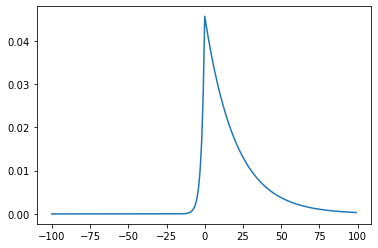

In [5]:
# exponential filter

ml = 2; mr = 20;
wid = 100
ltau = np.arange(-wid, 0)
lfilter = np.exp(-(-ltau)*(1/ml))

rtau = np.arange(0, wid)
rfilter = np.exp(-rtau*(1/mr))

tau = np.concatenate((ltau, rtau))
filter = np.concatenate((lfilter, rfilter))
filter = filter/np.sum(filter)

plt.plot(tau, filter)

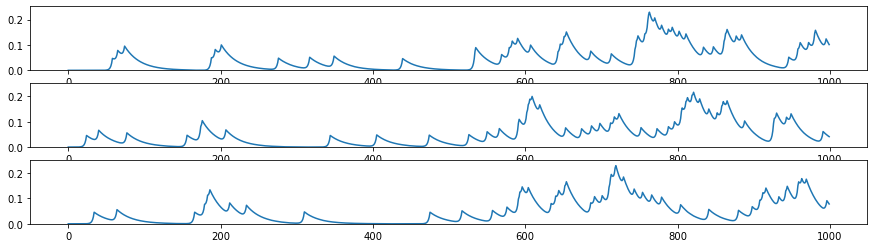

In [6]:
from scipy import signal

filtered1 = signal.convolve(spikes1, filter, mode='same')
filtered2 = signal.convolve(spikes2, filter, mode='same')
filtered3 = signal.convolve(spikes3, filter, mode='same')
t = np.arange(0, len(filtered1))

fig, axs = plt.subplots(nrows=3, ncols=1, figsize=(15,4))

maxs = np.max(np.concatenate((filtered1, filtered2, filtered2)))
axs[0].plot(t, filtered1); axs[0].set_ylim((0,maxs*1.1))
axs[1].plot(t, filtered2); axs[1].set_ylim((0,maxs*1.1))
axs[2].plot(t, filtered3); axs[2].set_ylim((0,maxs*1.1));

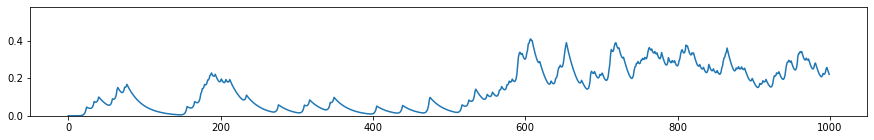

In [7]:
fig, ax = plt.subplots(figsize=(15,2))

maxs = np.max(filtered1+filtered2+filtered2)

ax.plot(t, (filtered1+filtered2+filtered3)); ax.set_ylim((0,maxs*1.1));

### hemodynamic response function example

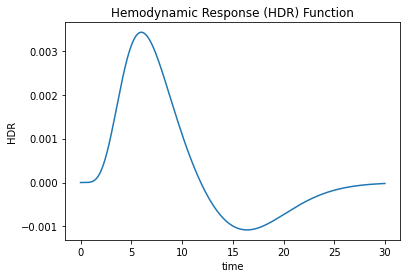

In [8]:
# HDR function from previous homework assignments

import numpy as np
import matplotlib.pyplot as plt
import math

def hdr(x, a1=6., b1=1., a2=16., b2=1., w=5. / 6.):
    HDRval1 = ((b1 ** a1) * (x ** a1) * np.exp(-x * b1)) / math.gamma(a1)
    HDRval2 = ((b2 ** a2) * (x ** a2) * np.exp(-x * b2)) / math.gamma(a2)
    HDRval = w * HDRval1 - (1 - w) * HDRval2
    return HDRval

def plothdr(x, h):
    plt.plot(x, h)
    plt.xlabel("time")
    plt.ylabel("HDR")
    plt.title("Hemodynamic Response (HDR) Function")
    plt.show()
   
dt = .01
x = np.arange(0, 30, dt)

h = hdr(x)
h = h/np.sum(h)

plothdr(x, h)

# note that this filter is NOT centered at zero (but zero is at the left)

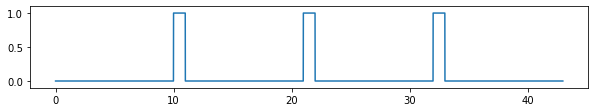

In [9]:
def create_steps(N, tevent, tgap, dt):
    seq = np.zeros(int(tgap*(1/dt)))
    for i in range(N):
        step = np.concatenate((np.ones(int(tevent*(1/dt))), np.zeros(int(tgap*(1/dt)))))
        seq = np.concatenate((seq, step))
    return (seq)

N = 3; tevent = 1; tgap = 10; dt = .01

seq = create_steps(N, tevent, tgap, dt)
tim = np.arange(0, N*(tevent+tgap)+tgap, dt)

fig, ax = plt.subplots(figsize=(10,1.5))
ax.plot(tim, seq);  ax.set_ylim((-.1, 1.1));

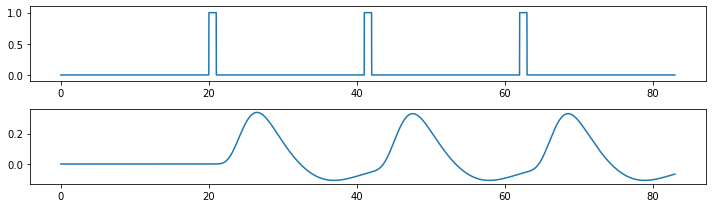

In [10]:
from scipy import signal

N = 3; tevent = 1; tgap = 20; dt = .01

seq = create_steps(N, tevent, tgap, dt)

# I did not include 'same' here to force a time shift because the filter is not centered at t=0
cseq = signal.convolve(np.float64(seq), np.float64(h))

fig, axs = plt.subplots(nrows=2, ncols=1, tight_layout=True, figsize=(10,3))

tim = np.arange(0, N*(tevent+tgap)+tgap, dt)

axs[0].plot(tim, seq);  axs[0].set_ylim((-.1, 1.1))

# here I take into account the longer filtered version because I left off 'same' above
axs[1].plot(tim, cseq[:len(seq)]);

### Convolution with 2D Images

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from IPython.display import display
from scipy import signal

im = Image.open('Jordingray-small.jpg')

imdata = np.asarray(im)
plt.imshow(im);

In [ ]:
# gaussian filter

fil = np.array([[1, 2, 1],
                [2, 4, 2],
                [1, 2, 1]])
fil = fil / np.sum(fil)

fimdata = signal.convolve2d(imdata, fil, mode='same')

fim = Image.fromarray(np.uint8(fimdata))

# this is a tiny image (play around with sz to see that)
sz = (imdata.shape)[0]*6
display(im.resize((sz,sz),resample=Image.Resampling.NEAREST))
display(fim.resize((sz,sz),resample=Image.Resampling.NEAREST))

# see what the "NEAREST" optional argument does by removing it
# display(im.resize((sz,sz)))
# display(fim.resize((sz,sz)))

In [ ]:
# larger gaussian filter

def my_mvnpdf(x, M, S):
    return (1 / np.sqrt((2 * np.pi * np.linalg.det(S)))) * np.exp(-(1/2) * (np.transpose(x-M) @ np.linalg.inv(S) @ (x-M)))

s = 5
sx = s; sy = s; rho = 0.0
mu = np.array([0, 0])
sig = np.array([[sx**2,     rho*sx*sy],
                [rho*sx*sy, sy**2]])

sz = 25
inc = 1
xsteps = np.arange(-sz, sz, 1)
ysteps = np.arange(-sz, sz, 1)
X, Y = np.meshgrid(xsteps, ysteps)
Z = np.zeros(X.shape)

for i in range(len(xsteps)):
    for j in range(len(ysteps)):
        xy = np.array([X[i,j], Y[i,j]])
        Z[i,j] = my_mvnpdf(xy, mu, sig)

fil = Z/np.sum(Z)

In [ ]:
im = Image.open('Jordingray.bmp')

imdata = np.asarray(im)

fimdata = signal.convolve2d(imdata, fil, mode='same')

fim = Image.fromarray(np.uint8(fimdata))

sz = (imdata.shape)[0]*1
display(im.resize((sz,sz), resample=Image.Resampling.NEAREST))
display(fim.resize((sz,sz),resample=Image.Resampling.NEAREST))

In [ ]:
im = Image.open('Jordingray-small.jpg')

imdata = np.asarray(im)

# first, blur with gaussian filter

filg = np.array([[1, 2, 1],
                 [2, 4, 2],
                 [1, 2, 1]])
filg = filg / np.sum(filg)

fimdatag = signal.convolve2d(np.float64(imdata), np.float64(filg), mode='same')
fimdatag[fimdatag<0]   = 0
fimdatag[fimdatag>255] = 255

# then, use a sharpen mask
fils = np.array([[ 0, -1,  0],
                 [-1,  5, -1],
                 [ 0, -1,  0]])
fils = fils / np.sum(fils)

fimdatas = signal.convolve2d(np.float64(fimdatag), np.float64(fils), mode='same')
fimdatas[fimdatas<0]   = 0
fimdatas[fimdatas>255] = 255

fimg = Image.fromarray(np.uint8(fimdatag))
fims = Image.fromarray(np.uint8(fimdatas))

sz = (imdata.shape)[0]*6
display(im.resize((sz,sz), Image.Resampling.NEAREST))
display(fimg.resize((sz,sz),Image.Resampling.NEAREST))
display(fims.resize((sz,sz),Image.Resampling.NEAREST))

In [ ]:
display(im)
display(fimg)
display(fims)

### Laplacian of Gaussians filter

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from scipy import signal

im = Image.open('Jordingray.bmp')

imdata = np.asarray(im)

fig = plt.figure(); ax = plt.axes()

ax.imshow(imdata, cmap='gray')
ax.set_xticks([]); ax.set_yticks([]);

In [ ]:
fLoG = np.array([[0,   1,   1,   2,   2,   2,   1,   1,   0],
                 [1,   2,   4,   5,   5,   5,   4,   2,   1],
                 [1,   4,   5,   3,   0,   3,   5,   4,   1],
                 [2,   5,   3, -12, -24, -12,   3,   5,   2],
                 [2,   5,   0, -24, -40, -24,   0,   5,   2],
                 [2,   5,   3, -12, -24, -12,   3,   5,   2],
                 [1,   4,   5,   3,   0,   3,   5,   4,   1],
                 [1,   2,   4,   5,   5,   5,   4,   2,   1],
                 [0,   1,   1,   2,   2,   2,   1,   1,   0]])

fimdata = signal.convolve2d(imdata, fLoG, mode='same')

fimdata

In [ ]:
fimdata[fimdata<0]   = 0
fimdata[fimdata>255] = 255

In [ ]:
fig = plt.figure(); ax = plt.axes()

ax.imshow(fimdata, cmap='gray')
ax.set_xticks([]); ax.set_yticks([]);

### cross-correlation and auto-correlation

In [ ]:
# pattern in signal

pattern = np.arange(-.5,.5,.01)
sig = np.tile(pattern, 20)

fig = plt.figure(figsize=(10,2.5)); ax = plt.axes()
ax.plot(sig);

In [ ]:
# add noise

import numpy.random as R

noise = .5
pattern = np.arange(-.5,.5,.01)
sig = np.tile(pattern, 20)
sig = np.concatenate((noise*R.randn(len(sig)), sig + noise*R.randn(len(sig)), noise*R.randn(len(sig))))

fig = plt.figure(figsize=(10,2.5)); ax = plt.axes()
ax.plot(sig);

In [ ]:
# cross-correlation

from scipy import signal

corr = signal.correlate(sig, pattern, mode='same')

ym = 1.1*np.max(np.abs(corr))
fig = plt.figure(figsize=(10,2.5)); ax = plt.axes()
ax.plot(corr); ax.set_ylim((-ym, ym));

In [ ]:
# cross-correlation with scrambled signal

scram = R.permutation(sig)

corr = signal.correlate(scram, pattern, mode='same')

fig = plt.figure(figsize=(10,2.5)); ax = plt.axes()
ax.plot(corr); ax.set_ylim((-ym, ym));

In [ ]:
# autocorrelation of signal with itself

corr = signal.correlate(sig, sig, mode='same')

ym = 1.1*np.max(np.abs(corr))
fig = plt.figure(figsize=(10,2.5)); ax = plt.axes()
ax.plot(corr); ax.set_ylim((-ym, ym));

In [ ]:
# autocorrelation with scrambled version

corr = signal.correlate(scram, scram, mode='same')

fig = plt.figure(figsize=(10,2.5)); ax = plt.axes()
ax.plot(corr); ax.set_ylim((-ym, ym));

# Fourier Analysis

In [ ]:
# fourier elements of a square wave

# number of elements
K = 10

L = 1

t = np.arange(0, 10, .01)

result = np.zeros(len(t))
parts = np.zeros((len(t),K))

fig, axs = plt.subplots(nrows=1, ncols=2, tight_layout=True, figsize=(10,5))

for n in range(1,K,2):

    parts[:,n] = (1/n)*np.sin(n*np.pi*t/L)
    result[:] = result[:] + parts[:,n]

# constituent sinusoids
axs[0].plot(t,parts)

# sum to this point
axs[1].plot(t,result);

In [ ]:
from scipy.fft import fft, ifft

fig, axs = plt.subplots(nrows=1, ncols=2, tight_layout=True, figsize=(10,5))

f1 = result

axs[0].plot(t,f1); axs[0].set_title('Original')

# take FFT
F = fft(result)

# take the inverse FFT
f2 = np.real(ifft(F))

axs[1].plot(t,f2); axs[1].set_title('Recovered');

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, ifft

# Sampling Rate
#   - could be samples per second (if time)
#   - could be samples per inch (if space)
#   - could be samples per degree of visual angle (if psychophys exp)
Sr = 250

# example function
t = np.arange(0, 100, 1/Sr)
f1 = 1*np.sin((2*np.pi)*2*t  + np.pi/6)      + \
     2*np.sin((2*np.pi)*5*t  + np.pi)        + \
     3*np.sin((2*np.pi)*10*t + np.pi/2)      + \
     1*np.sin((2*np.pi)*70*t + np.pi/4)

fig = plt.figure(); ax = plt.axes()

ax.plot(t[:int(len(t)/80)], f1[:int(len(t)/80)]);

In [ ]:
fig, axs = plt.subplots(nrows=1, ncols=2, tight_layout=True, figsize=(10,5))

axs[0].plot(t[:int(len(t)/80)], f1[:int(len(t)/80)]); axs[0].set_title('Original');

# take fourier
F = fft(f1)

# take the inverse FFT
f2 = np.real(ifft(F))

axs[1].plot(t[:int(len(t)/80)], f2[:int(len(t)/80)]); axs[1].set_title('Recovered');

In [ ]:
# num of samples
nsamples = len(t)

# fft
F = fft(f1)

# amplitude
A = abs(F)

# plot amplitude by frequency
# note that only half of the frequency range is meaningful
Freq = np.arange(0, nsamples)*(Sr/nsamples)

fig = plt.figure(); ax = plt.axes()
# ax.plot(Freq[:int(len(Freq)/2)], A[:int(len(A)/2)]); ax.set_xlabel('frequency'); ax.set_ylabel('amplitude');
ax.plot(Freq, A); ax.set_xlabel('frequency'); ax.set_ylabel('amplitude');

In [ ]:
# plot phase by frequency
Phase = np.arctan2(np.imag(F), np.real(F))

fig = plt.figure(); ax = plt.axes()
ax.plot(Freq, (A>.1)*Phase); ax.set_xlabel('frequency'); ax.set_ylabel('phase');

### 2D Fourier Analysis

In [ ]:
from scipy.fft import fft2, ifft2, fftshift
from PIL import Image
from IPython.display import display

im = Image.open('line90.jpg')
#im = Image.open('line45.jpg')
#im = Image.open('square.jpg')
#im = Image.open('line.jpg')

imdata = np.asarray(im)

F = fft2(imdata)
F2 = np.log(np.abs(fftshift(F)))

fig, axs = plt.subplots(nrows=1, ncols=2, tight_layout=True, figsize=(10,5))
axs[0].imshow(imdata, cmap='gray')
axs[1].imshow(F2, cmap='gray');

In [ ]:
from scipy.fft import fft2, ifft2, fftshift

im = Image.open('Jordingray.bmp')

imdata = np.asarray(im)

F = fft2(imdata)
F2 = np.log(np.abs(fftshift(F)))

fig, axs = plt.subplots(nrows=1, ncols=2, tight_layout=True, figsize=(10,5))
axs[0].imshow(imdata, cmap='gray')
axs[1].imshow(F2, cmap='gray');

In [ ]:
from scipy.fft import fft2, ifft2, fftshift

im = Image.open('zebras.jpg')
im = im.convert(mode="1")

imdata = np.asarray(im)

F = fft2(imdata)
F2 = np.log(np.abs(fftshift(F)))

fig, axs = plt.subplots(nrows=1, ncols=2, tight_layout=True, figsize=(10,5))
axs[0].imshow(imdata, cmap='gray')
axs[1].imshow(F2, cmap='gray');

In [ ]:
from scipy.fft import fft2, ifft2, fftshift
import numpy.random as R

im = Image.open('Jordingray.bmp')

imdata = np.asarray(im)

F = fft2(imdata)

# add noise to phase
A = abs(F)

# add noise to phase
pnoise = 0.5
P = np.arctan2(np.imag(F), np.real(F));
P += pnoise*R.randn(P.shape[0], P.shape[1])

F2 = A * np.exp(1j*P)

f2 = np.real(ifft2(F2))

fig, axs = plt.subplots(nrows=1, ncols=2, tight_layout=True, figsize=(10,5))
axs[0].imshow(imdata, cmap='gray')
axs[1].imshow(f2, cmap='gray');